# Contents: 
1. [Setting-up environment](#set)<br>
2. [Cleaning Data](#clean)<br>
    i. [level I cleaning.](#c1)<br>
    ii. [level II cleaning.](#c2)<br>
    iii. [level III cleaning.](#c3)<br>
    iv. [Type of missing values](#m)<br>
    v. [Dealing with missing values](#dm)<br>
    
3. [References](#r)

<a id='set'></a>
# Setting-up Environment

In [1]:
import os 
from termcolor import colored

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from distortion import *

In [2]:
# Paths
DATA_PATH = "../data/"
WUZZUF_PATH = os.path.join(DATA_PATH, 'wuzzuf_DS.csv')
UN_CLEANED1_DATA_PATH = os.path.join(DATA_PATH, 'un_cleaned_lvl1.csv')


# Configs
np.random.seed(101)
def SEP(sep='-', color='red', length=80):
    print(colored(f"{length*sep}", color))


if os.path.isfile(WUZZUF_PATH): 
    df = pd.read_csv(WUZZUF_PATH)
    display(df.head())
else: 
    print(f"File '{WUZZUF_PATH}' not found")

,Job Title,Location,Company,Time of Publishment,Job Type,Years of Experience,Skills
0,Data Science Software Engineer Intern,"Cairo, Egypt",Seuqel Solutions -,30 minutes ago,Internship,Student,"['· IT/Software Development', '· Engineering -..."
1,Data Science/Machine learning/AI Instructor,"Nasr City, Cairo, Egypt",EpsilonAI -,18 days ago,Full Time\nPart Time,Entry Level,"['· IT/Software Development', '· Engineering -..."
2,Data Management Engineer,"Cairo, Egypt",Ejada -,9 days ago,Full Time,Entry Level,"['· IT/Software Development', '· Engineering -..."
3,Data Analyst,"Zamalek, Cairo, Egypt",Al Ahly capital holding - Al Ahly Tamkeen -,9 days ago,Full Time,Experienced,"['· IT/Software Development', '· Analyst/Resea..."
4,Senior Big Data Engineer,"Cairo, Egypt",BBI-Consultancy -,11 days ago,Full Time,Experienced,['· IT/Software Development']


<a id='clean'></a>
# Cleaning Data: 

To clean data, we shall pass through `three` main levels of cleaning starting from `level I`, `level II` to `level III`.

<a id='c1'></a>
# Cleaning Data: Level I (Clean up the table)

>This level of cleaning is all about how the table looks. A level I cleaned dataset has three
characteristics:<br> 1) It is in a standard data structure,<br>2) It has codable and intuitive column titles,
and <br>3) each row has a unique identifier.


In [3]:
# First randomly generate un cleaned data
df_dist = pd.read_csv(UN_CLEANED1_DATA_PATH)
display(df_dist.head())

# Clean columns' names: 

def lvl1_clean(name): 
    '''
    It extract actual column name from string, 
    lower its characters, and concatenate its words in codable format.
    
    :Args: 
        name: name of column to be edited
    
    :Returns: 
        df: new column's name after being edited.
    '''
    name = name.split('_')[-1]
    name = name.lower()
    name = name.split()
    name = '_'.join(name)
    return name

new_columns = list(map(lvl1_clean, df_dist.columns))

SEP()
print(f"Columns before cleaning: \n{colored(list(df_dist.columns), 'red')}\n")
print(f"Columns before cleaning: \n{colored(list(new_columns), 'green')}\n")
SEP()

df_cleaned = df_dist.rename(columns=dict(zip(df_dist.columns, new_columns)))
display(df_cleaned.head())

,Column_1_JOb TItle,Column_2_LOCATion,Column_3_COMpAny,Column_4_TiMe of PubliShMeNT,Column_5_Job TyPE,Column_6_YEars oF ExpEriEnCe,Column_7_SkIlLS
0,Data Science Software Engineer Intern,"Cairo, Egypt",Seuqel Solutions -,30 minutes ago,Internship,Student,"['· IT/Software Development', '· Engineering -..."
1,Data Science/Machine learning/AI Instructor,"Nasr City, Cairo, Egypt",EpsilonAI -,18 days ago,Full Time\nPart Time,Entry Level,"['· IT/Software Development', '· Engineering -..."
2,Data Management Engineer,"Cairo, Egypt",Ejada -,9 days ago,Full Time,Entry Level,"['· IT/Software Development', '· Engineering -..."
3,Data Analyst,"Zamalek, Cairo, Egypt",Al Ahly capital holding - Al Ahly Tamkeen -,9 days ago,Full Time,Experienced,"['· IT/Software Development', '· Analyst/Resea..."
4,Senior Big Data Engineer,"Cairo, Egypt",BBI-Consultancy -,11 days ago,Full Time,Experienced,['· IT/Software Development']


--------------------------------------------------------------------------------
Columns before cleaning: 
['Column_1_JOb TItle', 'Column_2_LOCATion', 'Column_3_COMpAny', 'Column_4_TiMe of PubliShMeNT', 'Column_5_Job TyPE', 'Column_6_YEars oF ExpEriEnCe', 'Column_7_SkIlLS']

Columns before cleaning: 
['job_title', 'location', 'company', 'time_of_publishment', 'job_type', 'years_of_experience', 'skills']

--------------------------------------------------------------------------------


,job_title,location,company,time_of_publishment,job_type,years_of_experience,skills
0,Data Science Software Engineer Intern,"Cairo, Egypt",Seuqel Solutions -,30 minutes ago,Internship,Student,"['· IT/Software Development', '· Engineering -..."
1,Data Science/Machine learning/AI Instructor,"Nasr City, Cairo, Egypt",EpsilonAI -,18 days ago,Full Time\nPart Time,Entry Level,"['· IT/Software Development', '· Engineering -..."
2,Data Management Engineer,"Cairo, Egypt",Ejada -,9 days ago,Full Time,Entry Level,"['· IT/Software Development', '· Engineering -..."
3,Data Analyst,"Zamalek, Cairo, Egypt",Al Ahly capital holding - Al Ahly Tamkeen -,9 days ago,Full Time,Experienced,"['· IT/Software Development', '· Analyst/Resea..."
4,Senior Big Data Engineer,"Cairo, Egypt",BBI-Consultancy -,11 days ago,Full Time,Experienced,['· IT/Software Development']


<a id='c2'></a>
# Cleaning Data: Level II (Prepare for Analysis)

> A level II cases that tends to happen frequently:<br> 1) Unpacking Columns,<br>2) Reformulating the table
 <br>3) Restructioning the table.

### Wuzzuf Table case: 

| job_title                                   | location                | company     | time_of_publishment | job_type             |
|---------------------------------------------|-------------------------|-------------|---------------------|----------------------|
| Data Science/Machine learning/AI Instructor | Nasr City, Cairo, Egypt | EpsilonAI - | 11 days ago         | Full Time\nPart Time |
| Data Management Engineer                    | Cairo, Egypt            | Ejada -     | 3 days ago          | Full Time            |
|                                             |                         |             |                     |                      |

`Location Column`: Can be unpacked into three columns: `Country`, `City` and `district`.<br>

In [4]:
def get_country(location):
    country = location.split(',')[-1].lstrip()
    return country

def get_city(location):
    try: 
        city = location.split(',')[-2].lstrip()
    except: 
        city = ""
    return city

def get_district(location):
    try: 
        district = location.split(',')[-3].lstrip()
    except: 
        district = ""
    return district

df_cleaned['country'] = df_cleaned['location'].apply(get_country)
df_cleaned['city'] = df_cleaned['location'].apply(get_city)
df_cleaned['district'] = df_cleaned['location'].apply(get_district)

display(df_cleaned.sample(5))

,job_title,location,company,time_of_publishment,job_type,years_of_experience,skills,country,city,district
375,Odoo Telesales Specialist,"New Cairo, Cairo, Egypt",OdooTec -,18 days ago,Full Time,Experienced,"['· IT/Software Development', '· Marketing/PR/...",Egypt,Cairo,New Cairo
194,Sr. DevOps Engineer,"Heliopolis, Cairo, Egypt",Devexy -,18 days ago,Full Time,Experienced,['· IT/Software Development'],Egypt,Cairo,Heliopolis
415,Mechanical Engineer,"New Cairo, Cairo, Egypt",Hyundai Rotem -,18 days ago,Full Time,Experienced,['· Engineering - Mechanical/Electrical'],Egypt,Cairo,New Cairo
365,.Net Core/ Angular Full Stack developer,"Sheraton, Cairo, Egypt",Manzoma -,17 days ago,Full Time,Experienced,['· IT/Software Development'],Egypt,Cairo,Sheraton
19,ERP System Master Data Owner,"New Nozha, Cairo, Egypt",Confidential -,4 days ago,Full Time,Entry Level,['· Other'],Egypt,Cairo,New Nozha


# Restructioning the table

<font size=3>What if our analysis focuses basically on **Skills!** </font>

We will have to formulate another table that had a `skills` as a **primary key**.

For each skill we need to know: <br>

    1. most frequently related years of experience.
    2. most frequently district related to this skill.

In [5]:
def extract_skills(l_skills):
    skills = l_skills.split('\'')[1::2]
    skills = list(map(lambda x : x[2:], skills))
    return skills

skills_list = df_cleaned['skills'].apply(extract_skills).value_counts().index

skills_indices = {}
for skill_l in skills_list: 
    for skill in skill_l:
        skills_indices[skill] = [] 
    
# Store indixes of each skill in base data frame
for i in range(len(df_cleaned)):
    skills = df_cleaned.loc[i, 'skills']
    skills = extract_skills(skills)
    for skill in skills: 
            skills_indices[skill] += [i]
            
# Print indixes of each skill in base data frame
for k, v in skills_indices.items():
    print(k)
    print(v)
    SEP()

    
# Create measurments
df_skills = pd.DataFrame(index=skills_indices.keys())

mode_exp_years = []
mode_district = []

for k, v in skills_indices.items():
    _mode_exp_years = df_cleaned.loc[v, "years_of_experience"].value_counts().index[0] 
    mode_exp_years.append(_mode_exp_years)
    
    _mode_district = df_cleaned.loc[v, "district"].value_counts().index[0]
    mode_district.append(_mode_district)
    
df_skills['mode_exp_years'] = mode_exp_years
df_skills['mode_district'] = mode_district
display(df_skills)

IT/Software Development
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 96, 97, 98, 99, 100, 101, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 141, 142, 144, 145, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 201, 202, 203, 206, 207, 209, 210, 212, 213, 214, 218, 220, 221, 222, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 244, 245, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 

,mode_exp_years,mode_district
IT/Software Development,Experienced,
Engineering - Telecom/Technology,Experienced,
Installation/Maintenance/Repair,Experienced,
Analyst/Research,Experienced,
Project/Program Management,Manager,
Quality,Experienced,Maadi
Creative/Design/Art,Experienced,Nasr City
Accounting/Finance,Experienced,New Cairo
Engineering - Other,Experienced,
Banking,Experienced,


<a id='c3'></a>
# Cleaning Data: Level III (Evaluating and Correcting the values)

#### Level 3 focuses on the `recorded values`: 
1. make sure missing values in data have been detected.
2. ensure the recorded values are correct.
3. make sure extreme values (**Outliers**) have been detected and appropriate measures have been taken to address them.

<a id='m'></a>
# First: Missing values

Reference to data used: [Kaggle: Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTrain.csv)

### Diagnosis of missing values

missing values types: 
1. Missing Completely at Random (MCAR).
1. Missing at Random (MAR).
1. Missing not at Random(MNAR).


In [6]:
# Load data
climate_df = pd.read_csv(DATA_PATH + '/Time Series/DailyDelhiClimateTrain.csv')

print(f"Number of rows: {len(climate_df)}")
SEP(length=20)
display(climate_df.head())

column_names = {
    "meantemp" : "temp", 
    "meanpressure" : "pressure",
}

climate_df.rename(columns=column_names, inplace=True)
SEP(sep="=")
display(climate_df.head())



Number of rows: 1462
--------------------


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


,date,temp,humidity,wind_speed,pressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
# Distort data
uncleaned_df1 = level_3(climate_df, column1="pressure", percentage=0.1, kind=1)

print(f"percentage of null values in each column: \n{uncleaned_df1.isna().mean().round(2)}")

percentage of null values in each column: 
date          0.0
temp          0.0
humidity      0.0
wind_speed    0.0
pressure      0.1
dtype: float64


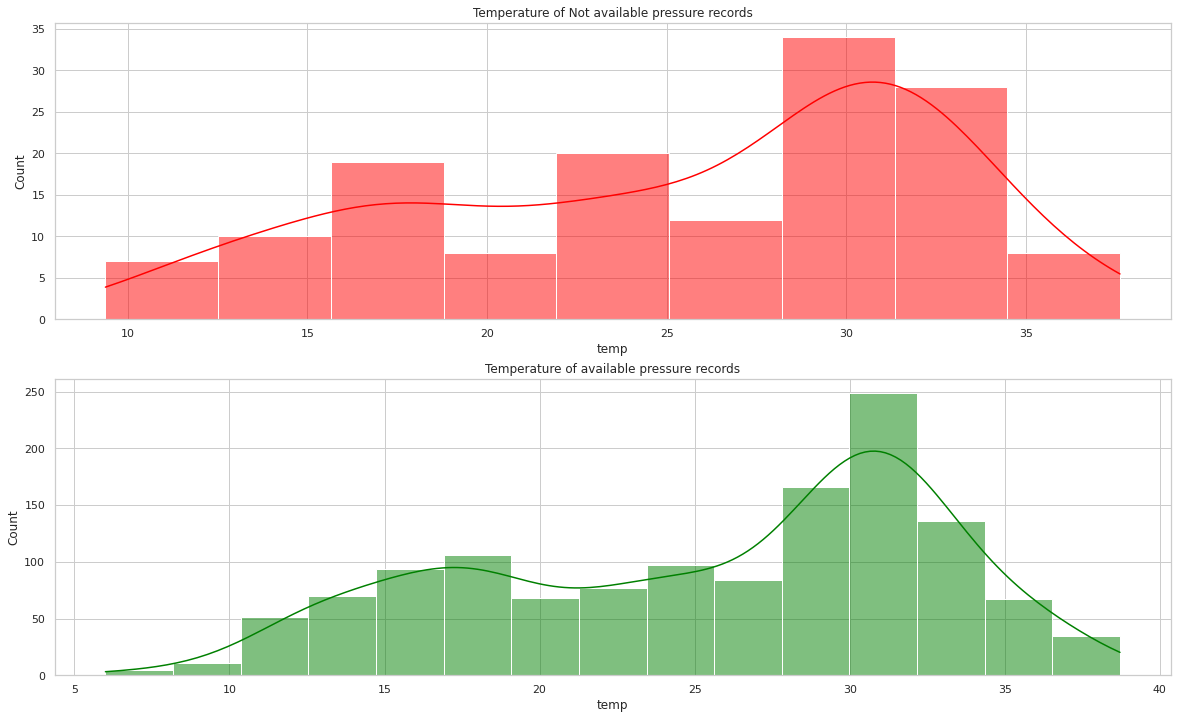

In [8]:
na_indices = uncleaned_df1['pressure'].isna()

na_temp = uncleaned_df1.loc[na_indices, "temp"]
temp = uncleaned_df1.loc[~na_indices, "temp"]

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 1, figsize=(20, 12));
sns.histplot(na_temp, kde=True, ax=axs[0], color='red').set(title="Temperature of Not available pressure records")


sns.histplot(temp, kde=True, ax=axs[1], color='green').set(title="Temperature of available pressure records");



From last figure, we notice that distribution of tempreture doesn't depend on whether rows are with or without values for pressure, 

we can calculate how much the first distribution differs from second distribution by calculating `two-sample t-test` that hypothesizes that there is no significant difference between the temperature's value among the two groups and then calculates the probability of the data turning out the way it has if the hypothesis is correct. 

In [9]:
from scipy.stats import ttest_ind

test_results = ttest_ind(na_temp, temp)

print(f"Hypothesis states: {colored('Missing values are completely at random', 'red')}.")
print(f"p-value for hypothesis: {colored(test_results.pvalue * 100, 'green')}")

Hypothesis states: Missing values are completely at random.
p-value for hypothesis: 93.73806560045583


$$p-value_{in-last-test} = 44.25 \% > 5 \%$$ So, we don't have much confident to reject null hypothesis.

then type of missing values at column `pressure` is `MCAR`

# MNAR

/home/mahmoud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/mahmoud/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


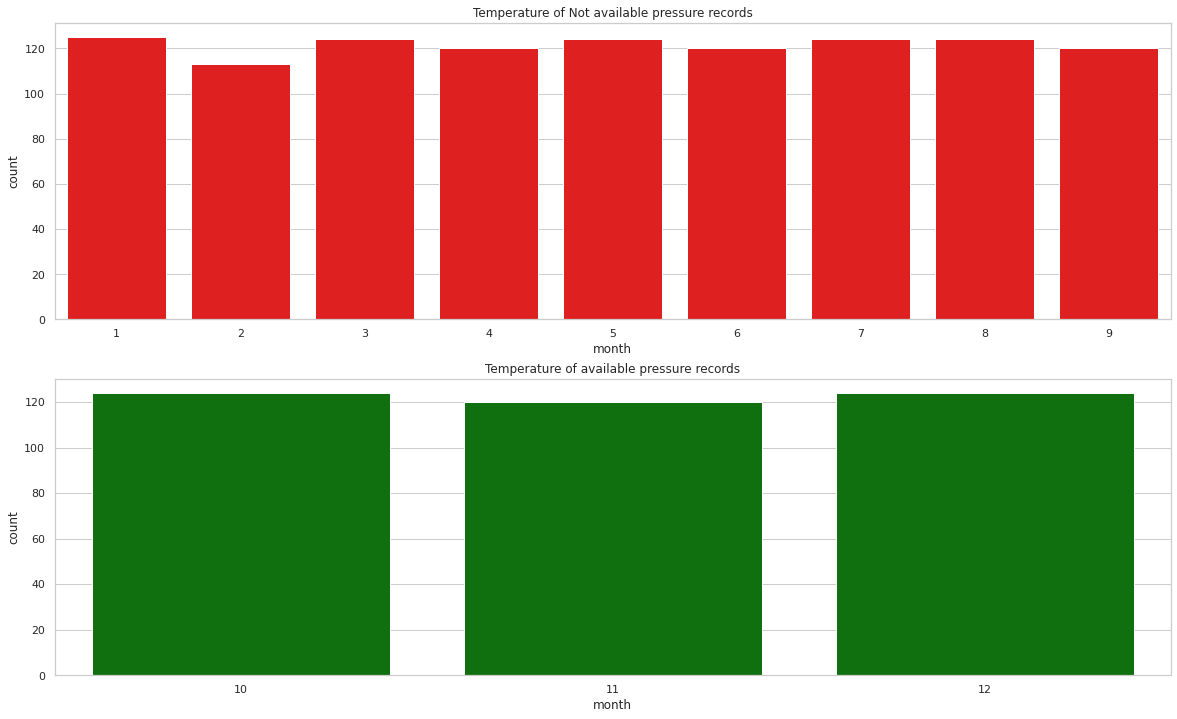

In [10]:
uncleaned_df2 = level_3(climate_df, column2="wind_speed", date_column="date", kind=2)

missing = uncleaned_df2['wind_speed'].isna()

missing_wind_speed = uncleaned_df2.loc[missing, "month"]
wind_speed = uncleaned_df2.loc[~missing, "month"]

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 1, figsize=(20, 12));
sns.countplot(missing_wind_speed, ax=axs[0], color='red').set(title="Temperature of Not available pressure records")


sns.countplot(wind_speed, ax=axs[1], color='green').set(title="Temperature of available pressure records");



In [11]:
test_results = ttest_ind(wind_speed, missing_wind_speed)

print(f"Hypothesis states: {colored('Missing values are completely at random', 'red')}.")
print(f"p-value for hypothesis: {colored(test_results.pvalue * 100, 'green')}")

Hypothesis states: Missing values are completely at random.
p-value for hypothesis: 7.850220949791851e-266


$$p-value_{in-last-test} = 7.85*10^{-266} \% <<< 5 \%$$ So, we should reject null hypothesis.

then type of missing values at column `wind_speed` is `MNAR`

<a id='dm'> </a>
# Dealing with missing values

<font size=3>Estimate and impute nulls for **MCAR** type</font>

For this type best estimating method is filling with global central tendency of feature (mean, median, mode).

In [12]:
uncleaned_df1['pressure'].fillna(value=uncleaned_df1['pressure'].mean(), inplace=True)

uncleaned_df1.isna().sum()

date          0
temp          0
humidity      0
wind_speed    0
pressure      0
dtype: int64

<a id='r'></a>
# References: 

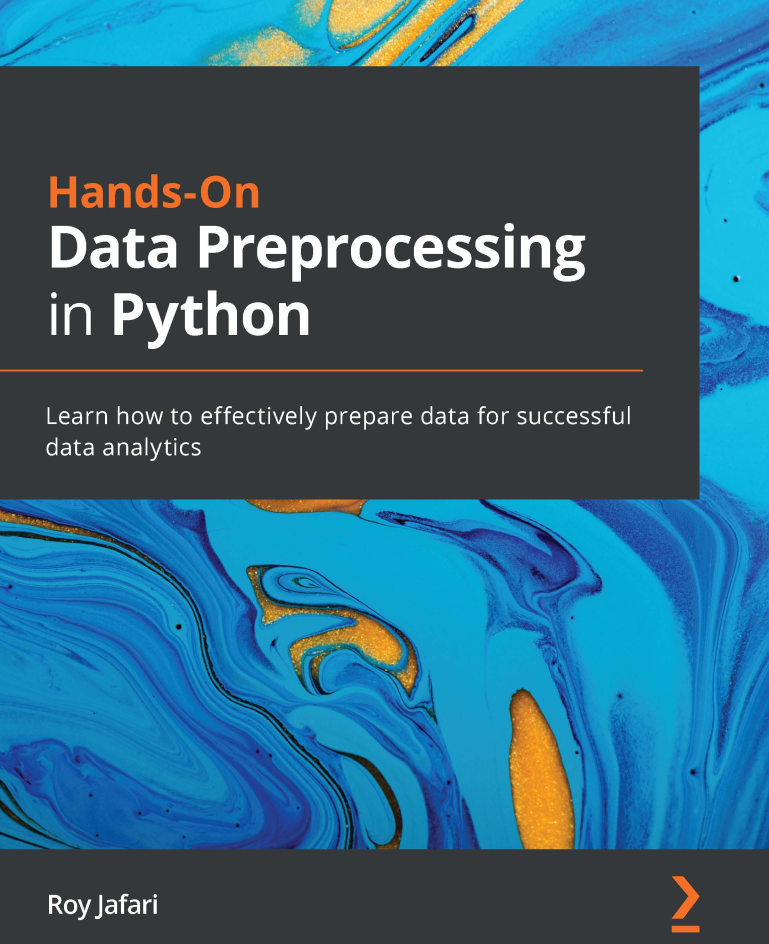